In [1]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import pandas_datareader as web
import datetime as dt 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [2]:
crypto_currency = 'BNB'
against_currency ='USD'

In [69]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()-dt.timedelta(days=50)

In [95]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start, end)

In [96]:
def difference(dataset, interval=1):
	diff = pd.Series()
	for i in range(interval, len(dataset)):
		value = (dataset[i] - dataset[i - interval])
		value = pd.Series(value,index=[dataset.index[i]])
		diff = diff.append(value)#,index = [dataset[i].index])
	return diff

In [97]:
new = difference(data['Close'])
new

<ipython-input-96-90844e33dccd>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  diff = pd.Series()


2021-01-01      0.528976
2021-01-02      0.336582
2021-01-03      2.907387
2021-01-04     -0.222626
2021-01-05      0.808247
                 ...    
2021-05-16    -50.865448
2021-05-17     -3.942078
2021-05-18   -168.996826
2021-05-19     54.587280
2021-05-20    -67.316437
Length: 141, dtype: float64

In [98]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
scaled_data = new.to_numpy()
# new = difference((data['Close'],1)
prediction_days = 10
future_days=0
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)-future_days):
    x_train.append(scaled_data[x-prediction_days:x])
    y_train.append(scaled_data[x+future_days])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
# y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1],1))

In [99]:
range(prediction_days, len(scaled_data))

range(10, 141)

In [100]:
#creating neural netowrk
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=25, batch_size=32)

Epoch 1/25
5/5 [==============================] - 4s 15ms/step - loss: 1078.7162
Epoch 2/25
5/5 [==============================] - 0s 18ms/step - loss: 1078.0442
Epoch 3/25
5/5 [==============================] - 0s 15ms/step - loss: 1075.7762
Epoch 4/25
5/5 [==============================] - 0s 15ms/step - loss: 1073.7008
Epoch 5/25
5/5 [==============================] - 0s 18ms/step - loss: 1070.6957
Epoch 6/25
5/5 [==============================] - 0s 15ms/step - loss: 1067.5245
Epoch 7/25
5/5 [==============================] - 0s 14ms/step - loss: 1068.2263
Epoch 8/25
5/5 [==============================] - 0s 14ms/step - loss: 1062.6106
Epoch 9/25
5/5 [==============================] - 0s 14ms/step - loss: 1059.8276
Epoch 10/25
5/5 [==============================] - 0s 15ms/step - loss: 1056.8865
Epoch 11/25
5/5 [==============================] - 0s 15ms/step - loss: 1053.2731
Epoch 12/25
5/5 [==============================] - 0s 14ms/step - loss: 1052.8304
Epoch 13/25
5/5 [========

<ipython-input-96-90844e33dccd>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  diff = pd.Series()


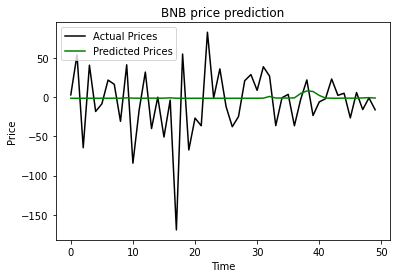

In [101]:
test_start = dt.datetime.now()-dt.timedelta(days=50)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo', test_start, test_end)
actual_prices = difference(test_data['Close']).to_numpy()

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data)-prediction_days:]
model_inputs=difference(model_inputs)
model_inputs = model_inputs.to_numpy()
# model_inputs = scaler.fit_transform(model_inputs)


x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

prediction_prices = model.predict(x_test)
# prediction_prices = scaler.inverse_transform(prediction_prices) 
plt.plot(actual_prices,color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [79]:
# # Predict Next Day
# real_data = [model_inputs[len(model_inputs) +1 - prediction_days: len(model_inputs) + 1,0]]
# real_data = np.reshape(real_data,-1)
# real_data = np.reshape(real_data, (real_data.shape))
# prediction = model.predict(real_data)
# prediction = scaler.inverse_transform(prediction)
# print()

In [102]:
model_inputs

array([-1.67506714e+01,  3.16937866e+01, -4.00866089e+01, -2.11853027e-01,
       -5.08654480e+01, -3.94207764e+00, -1.68996826e+02,  5.45872803e+01,
       -6.73164368e+01,  2.93050903e+02,  2.75378418e+00,  5.35830688e+01,
       -6.44837646e+01,  4.04624023e+01, -1.83823242e+01, -8.71710205e+00,
        2.15375366e+01,  1.61277466e+01, -3.08765869e+01,  4.09819336e+01,
       -8.41487427e+01, -1.67506714e+01,  3.16937866e+01, -4.00866089e+01,
       -2.11853027e-01, -5.08654480e+01, -3.94207764e+00, -1.68996826e+02,
        5.45872803e+01, -6.73164368e+01, -2.67922363e+01, -3.65584106e+01,
        8.23639526e+01, -1.19564819e+00,  3.57403259e+01, -1.21985168e+01,
       -3.77758789e+01, -2.48277588e+01,  2.07318726e+01,  2.85453186e+01,
        8.46530151e+00,  3.84676819e+01,  2.65455933e+01, -3.64125977e+01,
       -9.63470459e-01,  3.38836670e+00, -3.65100098e+01, -3.30883789e+00,
        2.17333069e+01, -2.35514832e+01, -6.24951172e+00, -2.19265747e+00,
        2.29079285e+01,  

In [143]:
data2 = scaler.fit_transform(data['Close'])
# data2[3:]
plt.plot(data2,color='black', label='Actual Prices')

ValueError: Expected 2D array, got 1D array instead:
array=[ 37.37603378  37.90501022  38.24159241  41.14897919  40.92635345
  41.73460007  42.16595459  43.44948959  42.39531708  43.9328537
  42.44847488  38.37136078  38.11161041  40.13593292  41.7936821
  40.91897964  43.17182541  45.68461227  45.3531723   42.78553391
  42.60689926  38.64583969  40.85757065  40.81547928  41.88160706
  41.623703    41.69473648  40.99487686  42.55307007  42.85234833
  44.77227783  44.27599335  51.60769653  51.05640411  52.24263763
  55.92512512  67.8455658   72.7335968   68.59052277  79.83154297
 107.89927673 129.7371521  124.43425751 136.94839478 133.4526825
 136.42651367 129.56788635 130.05665588 164.67010498 195.93263245
 332.61602783 255.95373535 293.92358398 267.50979614 230.99424744
 254.35913086 233.88595581 221.68043518 225.24943542 209.57440186
 254.62992859 239.52253723 241.09136963 229.94506836 226.37255859
 226.66685486 240.17921448 240.31866455 293.46322632 279.35803223
 289.790802   263.68582153 276.10470581 264.63674927 254.66082764
 258.10067749 269.8548584  261.70480347 264.05743408 264.7416687
 264.88616943 255.90019226 255.68966675 249.85137939 234.88543701
 255.10456848 269.10232544 269.19128418 275.21463013 311.42648315
 302.06344604 335.21289062 339.00772095 323.1335144  351.62438965
 367.77249146 403.59075928 374.65881348 418.03839111 453.1784668
 472.56033325 525.38555908 598.72265625 549.58654785 549.59185791
 542.63208008 510.22018433 520.41674805 481.03424072 505.09292603
 587.02911377 546.02355957 506.01300049 526.56524658 496.41506958
 505.07705688 534.57769775 568.47052002 562.63256836 599.70654297
 624.08056641 619.347229   622.10101318 675.68408203 611.20031738
 651.66271973 633.28039551 624.56329346 646.10083008 662.22857666
 631.35198975 672.33392334 588.18518066 571.43450928 603.1282959
 563.04168701 562.82983398 511.96438599 508.02230835 339.02548218
 393.61276245 326.29632568].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [144]:
data['Close']

Date
2020-12-31     37.376034
2021-01-01     37.905010
2021-01-02     38.241592
2021-01-03     41.148979
2021-01-04     40.926353
                 ...    
2021-05-16    511.964386
2021-05-17    508.022308
2021-05-18    339.025482
2021-05-19    393.612762
2021-05-20    326.296326
Name: Close, Length: 142, dtype: float64